# 3章 ニューラルネット

## 3.2 活性化関数

### 3.2.2 ステップ関数の実装

In [1]:
using LinearAlgebra
function step_function(x)
    map(Int, x .> 0)
end

step_function (generic function with 1 method)

### 3.2.3 ステップ関数のグラフ

In [2]:
using PyPlot

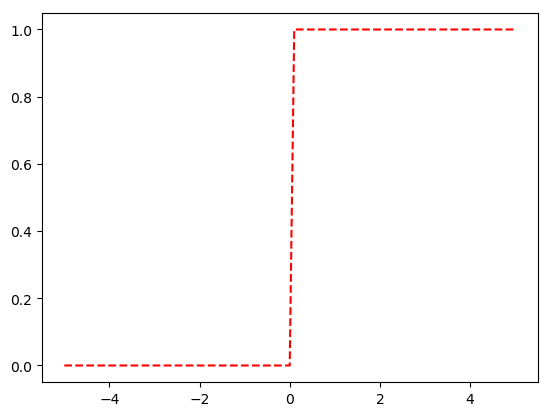

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002F8C32E8>

In [3]:
x = -5.0:0.1:5.0
y = step_function(x)
plot(x, y, "r--")

### 3.2.4 シグモイド関数の実装

In [4]:
function sigmoid(x)
    1.0 ./ (1.0 .+ exp.(-x))
end

sigmoid (generic function with 1 method)

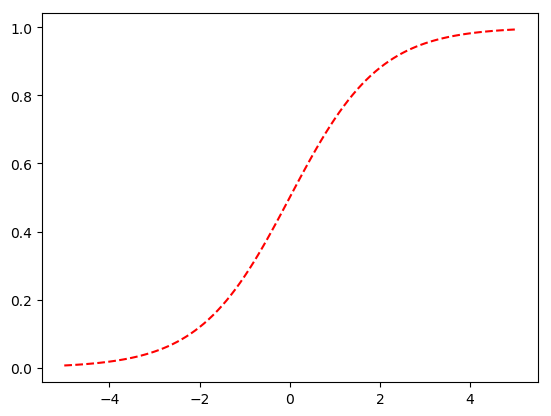

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FA88780>

In [5]:
y = sigmoid(x)
plot(x, y, "r--")

### 3.2.5 シグモイド関数とステップ関数の比較

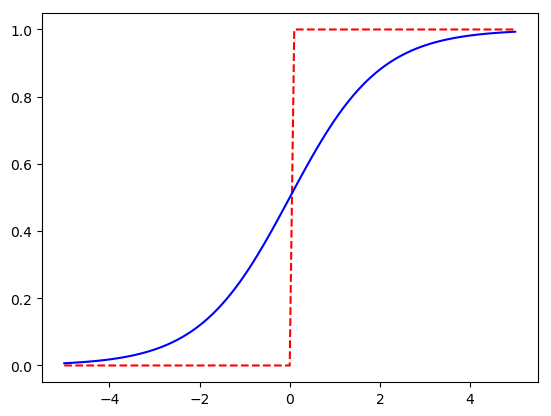

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002FAEC978>

In [6]:
y1 = step_function(x)
y2 = sigmoid(x)
plot(x, y1, "r--")
plot(x, y2, "b-")

### 3.2.7 ReLU関数

In [7]:
function relu(x)
    max.(0, x)
end

relu (generic function with 1 method)

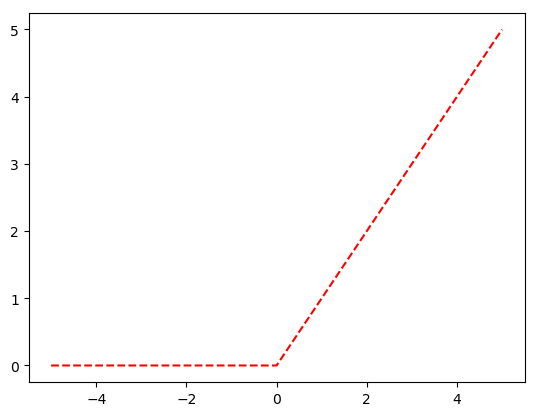

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002F94D048>

In [8]:
y = relu(x)
plot(x, y, "r--")

## 3.3 多次元配列の計算

### 3.3.1 多次元配列

In [9]:
A = [1, 2, 3, 4]

4-element Array{Int64,1}:
 1
 2
 3
 4

In [10]:
ndims(A)

1

In [11]:
size(A)

(4,)

In [12]:
size(A)[1]

4

In [13]:
B = [1 2; 3 4; 5 6]

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

In [14]:
ndims(B)

2

In [15]:
size(B)

(3, 2)

### 3.3.2 行列の内積

In [16]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [17]:
B = [5 6; 7 8]

2×2 Array{Int64,2}:
 5  6
 7  8

In [18]:
A * B

2×2 Array{Int64,2}:
 19  22
 43  50

In [19]:
A = [1 2 3; 4 5 6]

2×3 Array{Int64,2}:
 1  2  3
 4  5  6

In [20]:
B = [1 2; 3 4; 5 6]

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

In [21]:
A * B

2×2 Array{Int64,2}:
 22  28
 49  64

In [22]:
A = [1 2; 3 4; 5 6]

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

In [23]:
B = [7, 8]

2-element Array{Int64,1}:
 7
 8

In [24]:
A * B

3-element Array{Int64,1}:
 23
 53
 83

### 3.3.3 ニューラルネットワークの内積

In [25]:
X = [1, 2]

2-element Array{Int64,1}:
 1
 2

In [26]:
W = [1 3 5; 2 4 6]

2×3 Array{Int64,2}:
 1  3  5
 2  4  6

In [27]:
# Y = X * W
Y = X' * W

1×3 Adjoint{Int64,Array{Int64,1}}:
 5  11  17

※ Julia の1次元配列はベクトル（縦ベクトル）なので、↓の方が自然

In [28]:
X = [1, 2]

2-element Array{Int64,1}:
 1
 2

In [29]:
W = [1 2; 3 4; 5 6]

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

In [30]:
Y = W * X

3-element Array{Int64,1}:
  5
 11
 17

## 3.4 3層ニューラルネットワークの実装

### 3.4.2 各層における信号伝達の実装

In [31]:
X = [1.0, 0.5]

2-element Array{Float64,1}:
 1.0
 0.5

In [32]:
W1 = [0.1 0.2; 0.3 0.4; 0.5 0.6]

3×2 Array{Float64,2}:
 0.1  0.2
 0.3  0.4
 0.5  0.6

In [33]:
B1 = [0.1, 0.2, 0.3]

3-element Array{Float64,1}:
 0.1
 0.2
 0.3

In [34]:
A1 = W1 * X .+ B1

3-element Array{Float64,1}:
 0.30000000000000004
 0.7                
 1.1                

In [35]:
Z1 = sigmoid(A1)

3-element Array{Float64,1}:
 0.574442516811659 
 0.6681877721681662
 0.7502601055951177

In [36]:
W2 = [0.1 0.2 0.3; 0.4 0.5 0.6]

2×3 Array{Float64,2}:
 0.1  0.2  0.3
 0.4  0.5  0.6

In [37]:
B2 = [0.1, 0.2]

2-element Array{Float64,1}:
 0.1
 0.2

In [38]:
A2 = W2 * Z1 .+ B2

2-element Array{Float64,1}:
 0.5161598377933344
 1.2140269561658172

In [39]:
Z2 = sigmoid(A2)

2-element Array{Float64,1}:
 0.6262493703990729
 0.7710106968556123

In [40]:
W3 = [0.1 0.2; 0.3 0.4]

2×2 Array{Float64,2}:
 0.1  0.2
 0.3  0.4

In [41]:
B3 = [0.1, 0.2]

2-element Array{Float64,1}:
 0.1
 0.2

In [42]:
A3 = W3 * Z2 .+ B3

2-element Array{Float64,1}:
 0.3168270764110298
 0.6962790898619668

In [43]:
# `identity` は Julia 標準関数
Y = identity(A3)

2-element Array{Float64,1}:
 0.3168270764110298
 0.6962790898619668

### 3.4.3 実装のまとめ

In [44]:
function init_network()
    network = Dict(
        :W1 => [0.1 0.2; 0.3 0.4; 0.5 0.6],
        :b1 => [0.1, 0.2, 0.3],
        :W2 => [0.1 0.2 0.3; 0.4 0.5 0.6],
        :b2 => [0.1, 0.2],
        :W3 => [0.1 0.2; 0.3 0.4],
        :b3 => [0.1, 0.2]
    )
    network
end

init_network (generic function with 1 method)

In [45]:
function forward(network, x)
    W1, W2, W3 = network[:W1], network[:W2], network[:W3]
    b1, b2, b3 = network[:b1], network[:b2], network[:b3]
    
    a1 = W1 * x .+ b1
    z1 = sigmoid(a1)
    a2 = W2 * z1 .+ b2
    z2 = sigmoid(a2)
    a3 = W3 * z2 .+ b3
    y = identity(a3)
    
    y
end

forward (generic function with 1 method)

In [46]:
network = init_network()
x = [1.0, 0.5]
y = forward(network, x)
println(y)

[0.316827, 0.696279]


## 3.5 出力層の設計

### 3.5.1 恒等関数とソフトマックス関数

In [47]:
function softmax0(a::AbstractVector{T}) where {T<:AbstractFloat}
    exp_a = exp.(a)
    sum_exp_a = sum(exp_a)
    exp_a ./ sum_exp_a
end

softmax0 (generic function with 1 method)

In [48]:
a = [0.3, 2.9, 4.0]
softmax0(a)

3-element Array{Float64,1}:
 0.018211273295547534
 0.2451918129350739  
 0.7365969137693785  

### 3.5.2 ソフトマックス関数の実装上の注意

In [49]:
function softmax(a::AbstractVector{T}) where {T<:AbstractFloat}
    c = maximum(a)  # オーバーフロー対策
    exp_a = exp.(a .- c)
    sum_exp_a = sum(exp_a)
    exp_a ./ sum_exp_a
end

function softmax(a::AbstractMatrix{T}) where {T<:AbstractFloat}
    mapslices(softmax, a, 1)
end

softmax (generic function with 2 methods)

In [50]:
a = [0.3, 2.9, 4.0]
softmax(a)

3-element Array{Float64,1}:
 0.01821127329554753
 0.24519181293507386
 0.7365969137693786 

In [51]:
a = [1010.0, 1000.0, 990.0]
softmax0(a)

3-element Array{Float64,1}:
 NaN
 NaN
 NaN

In [52]:
a = [1010.0, 1000.0, 990.0]
softmax(a)

3-element Array{Float64,1}:
 0.999954600070331    
 4.5397868608866656e-5
 2.061060046209062e-9 

## 3.6 手書き数字認識

### 3.6.1 MNIST データセット

- Flux.Data.MNISTに入っている

In [53]:
using Flux.Data.MNIST

In [54]:
X_train = MNIST.images(:train);
t_train = MNIST.labels(:train);
X_test = MNIST.images(:test);
t_test = MNIST.labels(:test);

In [55]:
size(X_train)

(60000,)

In [56]:
size(t_train)

(60000,)

In [57]:
size(X_test)

(10000,)

In [58]:
size(t_test)

(10000,)

※ `MNIST` パッケージの `traindata()` `testdata()` には引数は存在しない。  
　データは「normalizeなし（数値は全て0.0〜255.0）」「画像はflatten（28x28x1 のグレースケール画像として利用するには reshape 必要）」「one_hot_labelではない（ラベルは0.0〜9.0の数値）」となっている。

In [59]:
print(X_train[1])

ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}}[Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0); Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gray{N0f8}(0.0) Gra

In [60]:
t_train[1]

5

In [61]:
X_train[1]

In [62]:
reshape(float.(X_train[1]), (28 * 28,))

784-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0